'''<br>
Author: Nikhil Patil<br>
Date: 11-11-2024<br>
Last Modified by: Nikhil Patil<br>
Last Modified time: 11-11-2024 <br>
Title : Predict apparent temperature based on humidity using Simple Linear Regression<br>

'''

## **Step 1: Import Required Libraries**

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


## **Step 2: Load the Dataset**

In [25]:
# Load the dataset from a local file or a URL if you have it downloaded
df = pd.read_csv('weatherHistory.csv')


## **Step 3: Explore the Dataset**

In [26]:
df.shape

(96453, 12)

In [27]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## **Step 4: Check for Missing Values**

In [28]:
# Check for any missing values in the dataset
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

## **Step 5: Select Features and Target Variable**
#### For our linear regression model, we set X (independent variable) to Humidity and y (dependent variable) to Apparent Temperature.


In [29]:
# Select 'Humidity' as the feature and 'Apparent Temperature' as the target variable
X = df[['Humidity']]
y = df['Apparent Temperature (C)']


## **Step 6: Checking Outliers using Boxplot and removing using IOR Method**

<Axes: ylabel='Humidity'>

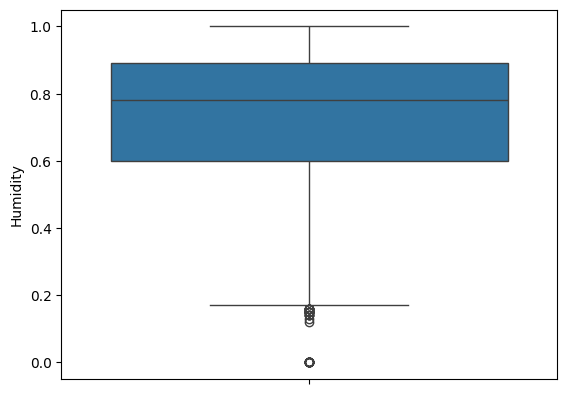

In [30]:
sns.boxplot(data=df['Humidity'])


<Axes: ylabel='Apparent Temperature (C)'>

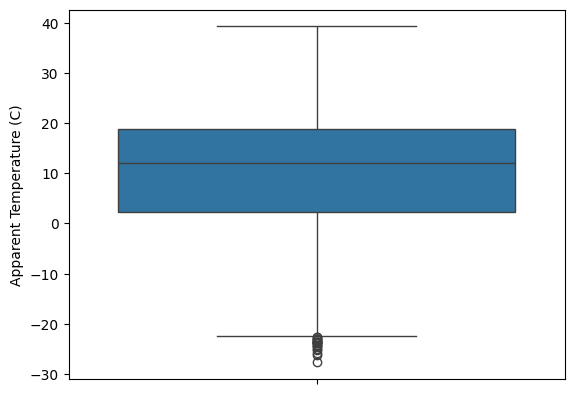

In [31]:
sns.boxplot(data=df['Apparent Temperature (C)'])


In [32]:
Q1 = df['Humidity'].quantile(0.25)
Q3 = df['Humidity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

clean_df = df[(df['Humidity'] > lower_bound) & (df['Humidity'] < upper_bound)]

<Axes: ylabel='Humidity'>

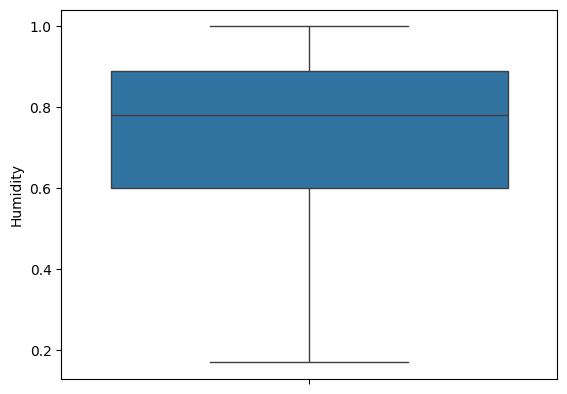

In [ ]:
sns.boxplot(data=clean_df['Humidity'])

In [34]:
Q1 = clean_df['Apparent Temperature (C)'].quantile(0.25)
Q3 = clean_df['Apparent Temperature (C)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

clean_df = clean_df[(clean_df['Apparent Temperature (C)'] > lower_bound) & (clean_df['Apparent Temperature (C)'] < upper_bound)]


<Axes: ylabel='Apparent Temperature (C)'>

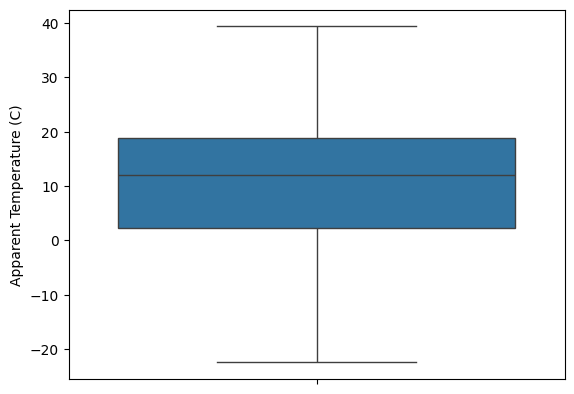

In [35]:
sns.boxplot(data=clean_df['Apparent Temperature (C)'])

In [36]:
clean_df.isnull().sum()


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

## **Step 6: Split the Data into Training and Test Sets**
#### We split the data into training and testing sets to evaluate the model's performance. test_size=0.2 means 20% of data is used for testing, and random_state ensures consistent results.

In [37]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Step 7: Visualize the Relationship between Humidity and Apparent Temperature**
##### A scatter plot allows us to observe the relationship between humidity and apparent temperature and to see if a linear model is appropriate.

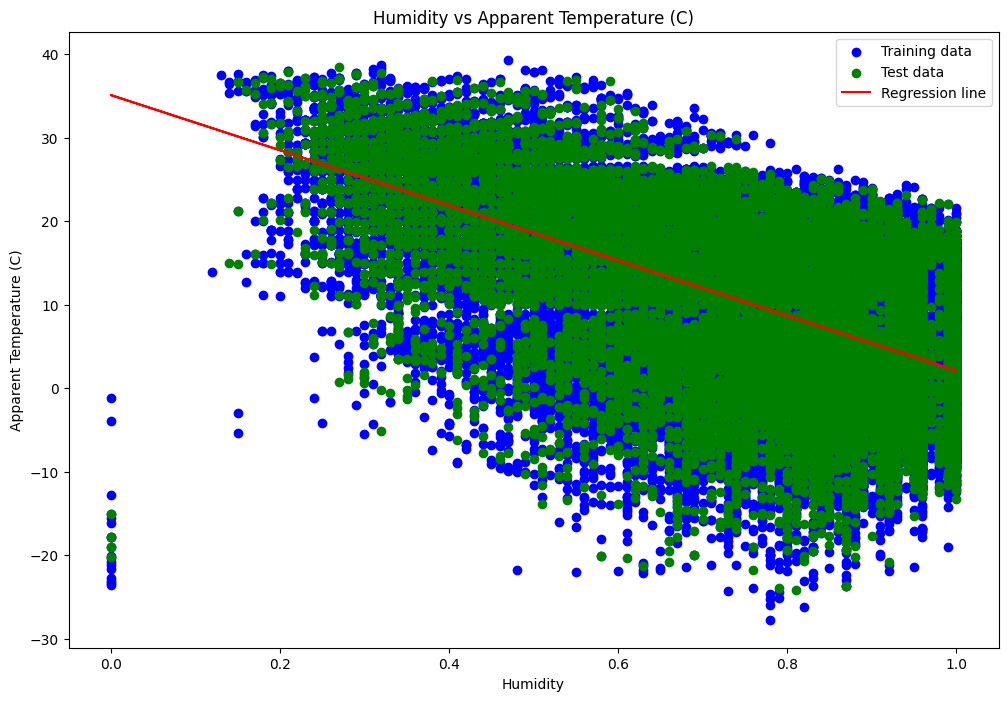

In [46]:
plt.figure(figsize=(12,8))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.title('Humidity vs Apparent Temperature (C)')
plt.legend()
plt.show()

## **Step 8: Train the Linear Regression Model**
##### We initialize a LinearRegression model and train it on our training data (X_train, y_train). This step finds the best-fit line for the training data.

In [39]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## **Step 9: Model Coefficients**
##### This gives us the slope (coefficient) and intercept of the linear regression model, which define our model’s equation:
##### **Apparent Temperature = Coefficient × Humidity + Intercept**


In [40]:
# Display the model coefficients
print(f"Model Coefficient: {model.coef_[0]}")
print(f"Model Intercept: {model.intercept_}")

Model Coefficient: -32.99558641937058
Model Intercept: 35.11264261816306


## **Step 10: Make Predictions on the Test Data**
#### Using the predict method, we apply the trained model on X_test to generate predictions (y_pred) for apparent temperature.


In [41]:
# Predict the apparent temperature for the test set
y_pred = model.predict(X_test)

## **Step 11: Evaluate the Model Performance**
##### We assess the model’s accuracy using Mean Squared Error (MSE), which measures the average squared difference between actual and predicted values, and R-squared (R²), which tells us how well our model explains the variance in the target variable.


In [42]:
# Calculate Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 74.19147075318766
R-squared: 0.3587532329296208


## **Step 12: Visualize the Model’s Predictions**
##### This plot shows the actual vs predicted values, helping us visually assess the model’s accuracy. Points closer to each other represent a better fit.

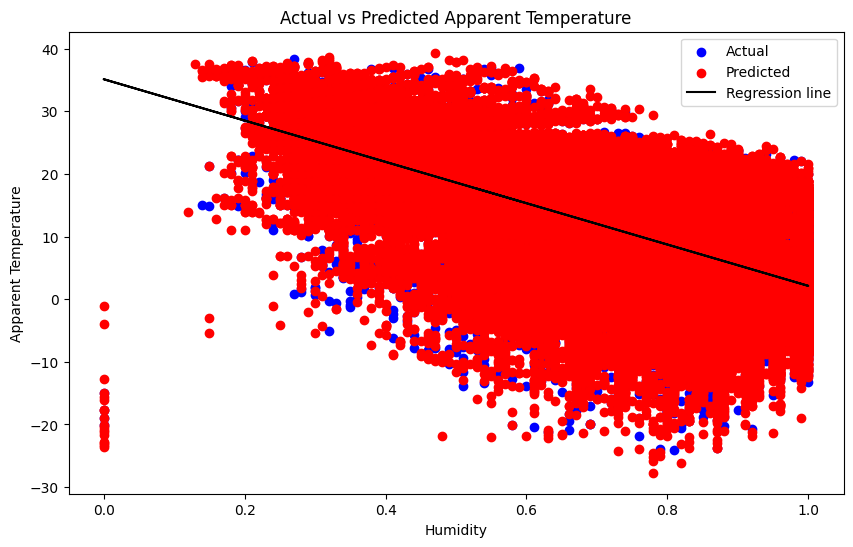

In [50]:
# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_train, y_train, color='red', label='Predicted')
plt.plot(X_test, y_pred, color='black', label='Regression line')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature')
plt.title('Actual vs Predicted Apparent Temperature')
plt.legend()
plt.show()